## Welch's T-Test

In [1]:
import numpy as np

In [2]:
sample1 = np.random.normal(loc = 10, scale = 1, size = 30)
#sample1

In [3]:
sample2 = np.random.normal(loc = 10.5, scale = 5, size = 30)

In [4]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.xkcd();

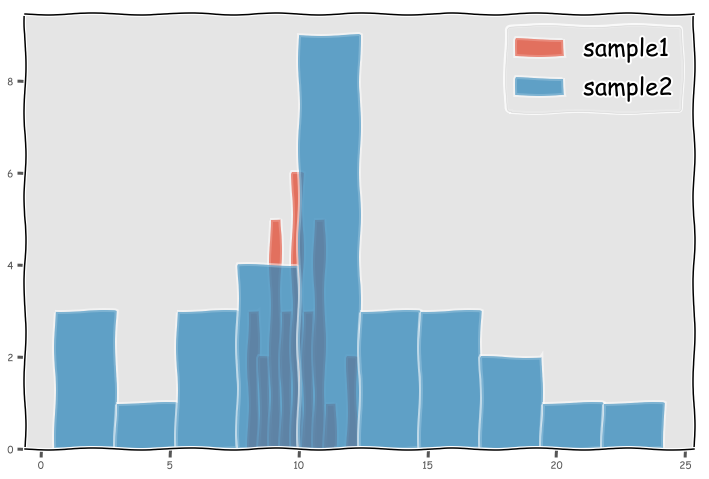

In [5]:
fig = plt.figure(figsize = (12, 8))
plt.hist(sample1, label = 'sample1', alpha = 0.5)
plt.hist(sample2, label = 'sample2', alpha = 0.5)
plt.legend(fontsize = 24);

In [6]:
sample1.mean(), sample2.mean()

(9.845497975073025, 11.382377160458269)

In [7]:
sample1.std(), sample2.std()

(1.0452784981235455, 5.28595425741003)

In [8]:
from scipy import stats

In [9]:
stats.ttest_ind(sample1, sample2, equal_var=False)

Ttest_indResult(statistic=-1.535981175647268, pvalue=0.13460246431051126)

## Multiple Comparison Problem 

In [10]:
alpha = 0.05
1 - ((1-0.05) **5)

0.22621906250000023

# ANOVA  - Lab

## Introduction

In this lab, you'll get some brief practice generating an ANOVA table (AOV) and interpreting its output. You'll then also perform some investigations to compare the method to the t-tests you previously employed to conduct hypothesis testing.

## Objectives

You will be able to:
* Use ANOVA for testing multiple pairwise comparisons
* Understand and explain the methodology behind ANOVA tests

## Loading the Data

Start by loading in the data stored in the file **ToothGrowth.csv**.

In [12]:
ls

CONTRIBUTING.md  README.md        index.ipynb
LICENSE.md       ToothGrowth.csv


In [13]:
# Your code here
import pandas as pd
df = pd.read_csv('ToothGrowth.csv')

In [14]:
df.head()

,len,supp,dose
0,4.2,VC,0.5
1,11.5,VC,0.5
2,7.3,VC,0.5
3,5.8,VC,0.5
4,6.4,VC,0.5


In [15]:
df.describe()

,len,dose
count,60.000000,60.000000
mean,18.813333,1.166667
std,7.649315,0.628872
min,4.200000,0.500000
25%,13.075000,0.500000
50%,19.250000,1.000000
75%,25.275000,2.000000
max,33.900000,2.000000


In [16]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

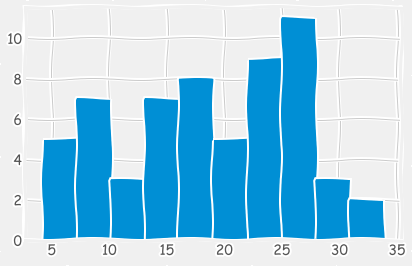

In [17]:
df['len'].hist()

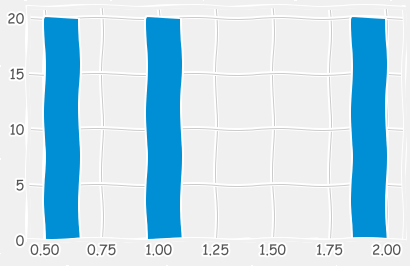

In [18]:
df['dose'].hist()

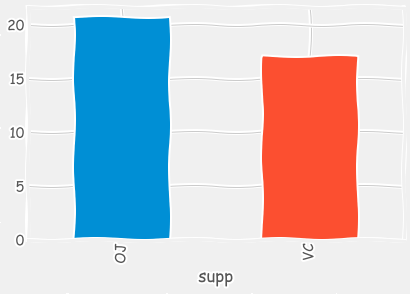

In [19]:
df.groupby('supp')['len'].mean().plot(kind = 'bar')

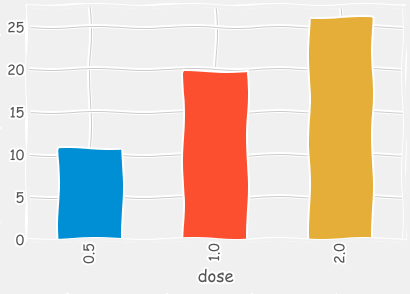

In [20]:
df.groupby('dose')['len'].mean().plot(kind = 'bar')

## Generating the ANOVA Table

Now generate an ANOVA table in order to analyze the influence of the medication and dosage 

In [21]:
#Your code here
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [27]:
formula = 'len ~ C(supp) + C(dose)'
lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, typ = 2)
print(table)

               sum_sq    df          F        PR(>F)
C(supp)    205.350000   1.0  14.016638  4.292793e-04
C(dose)   2426.434333   2.0  82.810935  1.871163e-17
Residual   820.425000  56.0        NaN           NaN


## Reading the Table

Make a brief comment regarding the statistics regarding the effect of supplement and dosage on tooth length.

In [ ]:
# Your comment here

## Comparing to T-Tests

Now that you've gotten a brief chance to interact with ANOVA, its interesting to compare the results to those from the t-tests you were just working with. With that, start by breaking the data into two samples: those given the OJ supplement, and those given the VC supplement. Afterwards, you'll conduct a t-test to compare the tooth length of these two different samples.

In [24]:
#Your code here
df.head(2)

,len,supp,dose
0,4.2,VC,0.5
1,11.5,VC,0.5


In [25]:
df_oj = df[df['supp'] == 'OJ']
df_vc = df[df['supp'] == 'VC']

Now compare a t-test between these two groups and print the associated two-sided p-value.

In [28]:
#Your code here; calculate the 2-sided p-value for a t-test comparing the two supplement groups.
from scipy import stats

In [29]:
df_oj['len'].std(), df_vc['len'].std()

(6.605561049722362, 8.266028664664638)

In [30]:
stats.ttest_ind(df_oj['len'], df_vc['len'], equal_var=False)

Ttest_indResult(statistic=1.91526826869527, pvalue=0.06063450788093387)

## A 2-Category ANOVA F-Test is Equivalent to a 2-Tailed t-Test!

Now, recalculate an ANOVA F-test with only the supplement variable. An ANOVA F-test between two categories is the same as performing a 2-tailed t-Test! So, the p-value in the table should be identical to your calculation above.

> Note: there may be a small fractional difference (>0.001) between the two values due to a rounding error between implementations. 

In [32]:
df.shape

(60, 3)

In [31]:
#Your code here; conduct an ANOVA F-test of the oj and vc supplement groups.
#Compare the p-value to that of the t-test above. 
#They should match (there may be a tiny fractional difference due to rounding errors in varying implementations)
formula = 'len ~ C(supp)'
lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, typ = 2)
print(table)

               sum_sq    df         F    PR(>F)
C(supp)    205.350000   1.0  3.668253  0.060393
Residual  3246.859333  58.0       NaN       NaN


## Generating Multiple T-Tests

While the 2-category ANOVA test is identical to a 2-tailed t-Test, performing multiple t-tests leads to the multiple comparisons problem. To investigate this, look at the various sample groups you could create from the 2 features: 

In [7]:
for group in df.groupby(['supp', 'dose'])['len']:
    group_name = group[0]
    data = group[1]
    print(group_name)

('OJ', 0.5)
('OJ', 1.0)
('OJ', 2.0)
('VC', 0.5)
('VC', 1.0)
('VC', 2.0)


While bad practice, examine the effects of calculating multiple t-tests with the various combinations of these. To do this, generate all combinations of the above groups. For each pairwise combination, calculate the p-value of a 2 sided t-test. Print the group combinations and their associated p-value for the two-sided t-test.

In [ ]:
#Your code here; reuse your t-test code above to calculate the p-value for a 2-sided t-test
#for all combinations of the supplement-dose groups listed above. 
#(Since there isn't a control group, compare each group to every other group.)

## Summary

In this lesson, you examined the ANOVA technique to generalize A/B testing methods to multiple groups and factors.